In [1]:
import pandas as pd


In [2]:
heart = pd.read_csv('heart_disy2.csv')# Dropping null values
heart = heart.dropna()
heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,0,0,11


In [3]:
heart['HeartDiseaseorAttack'].value_counts()

0    13394
1     1605
Name: HeartDiseaseorAttack, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [5]:
X = heart.drop('HeartDiseaseorAttack',axis=1)
y = heart['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)

RandomForestClassifier()

In [6]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.8473333333333334


In [8]:
import joblib
joblib.dump(rf, 'heart_model.pkl') 

['heart_model.pkl']

In [9]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

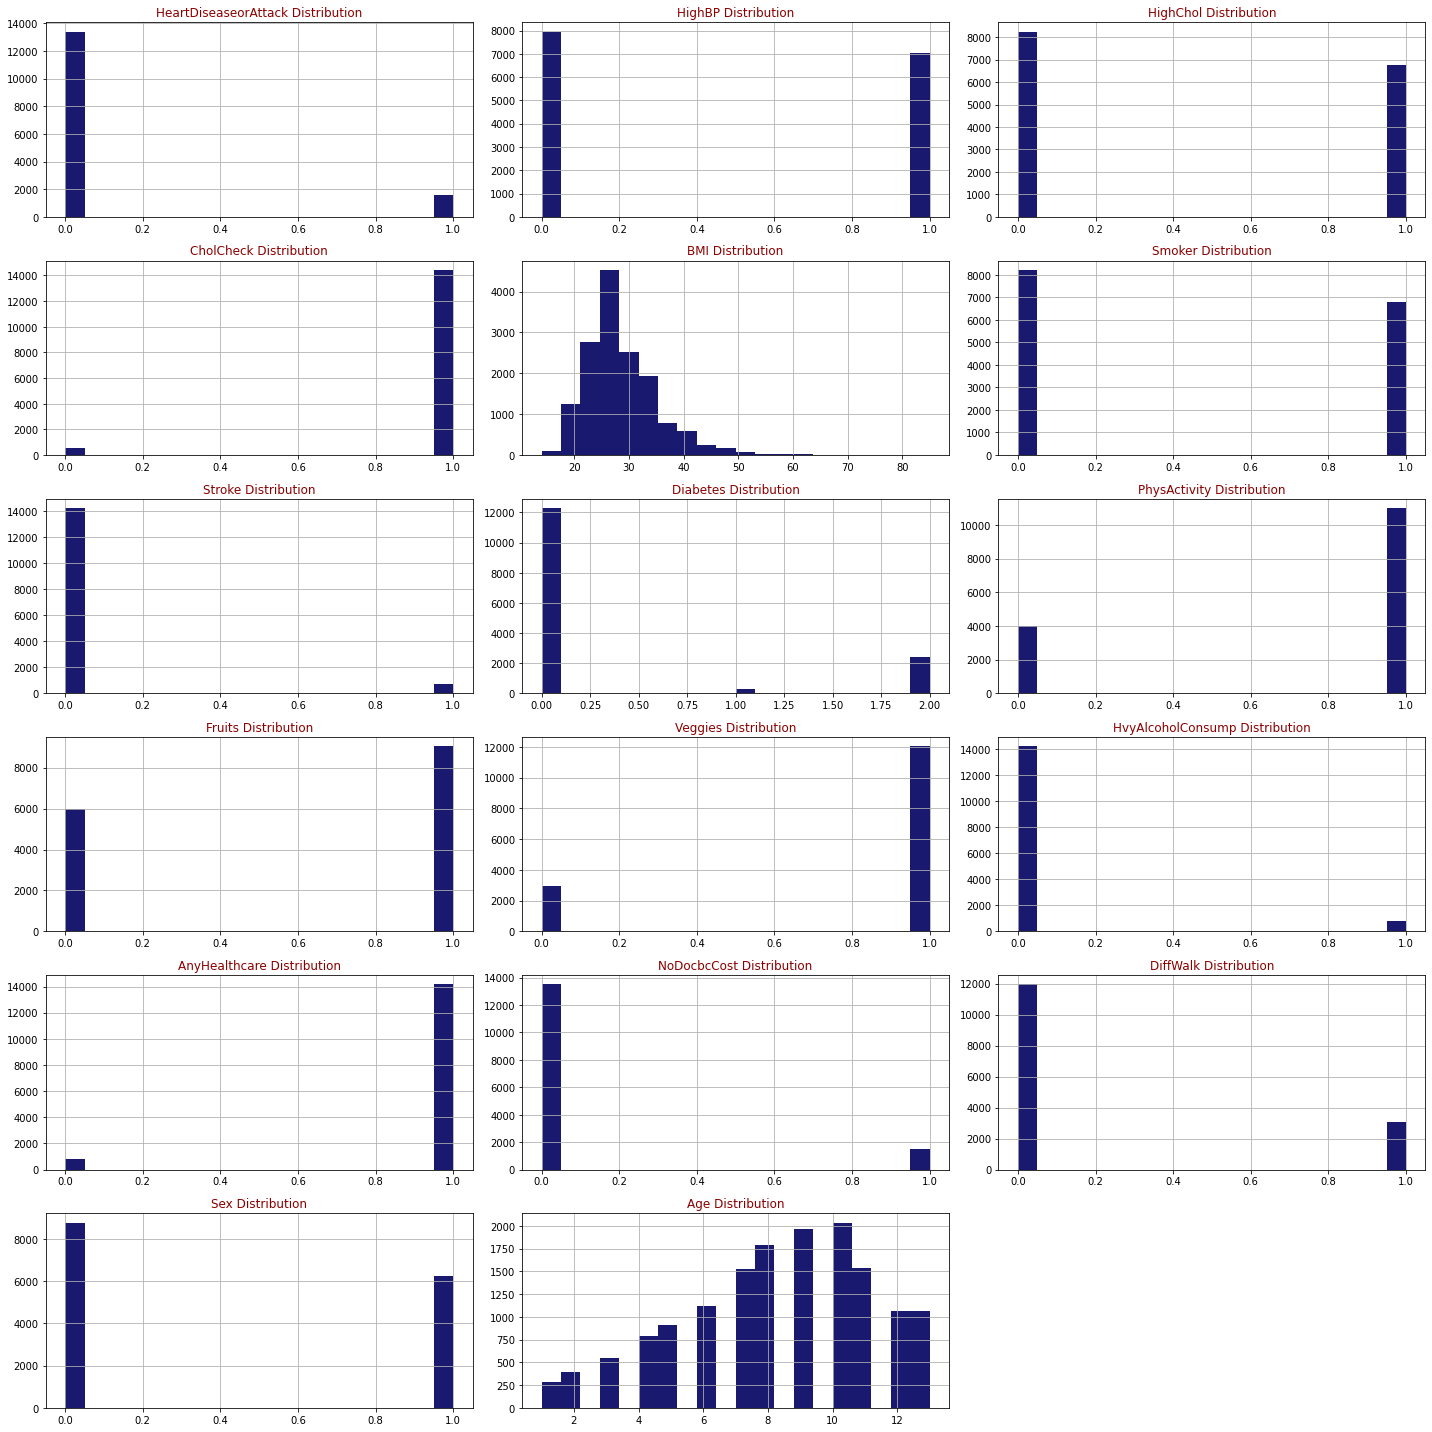

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)